# visualize and manipulate the data interactively examples
this page show how to visualize and manipulate the data, 
i write db.py at notebook folder, use that can easily create some query.
- https://github.com/mkleehammer/pyodbc/wiki pyodbc-wiki
- http://docs.actian.com/vector/5.0/index.html#page/SQLLang%2FSQL_Language_Guide.htm%23 actian vector db sql documents
- https://matplotlib.org/2.0.2/index.html matplotlib document

## now, let's create some basic query
the query language is sql , like mysql or mssql, if we want get the count, we need use `select count(*) from ontime`.

In [8]:
import db
import pandas
pandas.DataFrame(db.query('select count(*) from ontime'),columns=['totalCount'])


,totalCount
0,547219


### how many items at 2011 year?


In [6]:
pandas.DataFrame(db.query('select year,count(*) as c1 from ontime group by YEAR'),columns=['year','count'])

,year,count
0,2011,547219


### how about get the top 20 that order by flightdate?

In [7]:
pandas.DataFrame(
    db.query('select top 20 flightdate,uniquecarrier,origin,origincityname from ontime order BY 1 asc'),
    columns=['date','carrier','origin','origin_city'])

,date,carrier,origin,origin_city
0,2011-07-01,XE,IAH,"Houston, TX"
1,2011-07-01,XE,CLE,"Cleveland, OH"
2,2011-07-01,XE,MSN,"Madison, WI"
3,2011-07-01,XE,EWR,"Newark, NJ"
4,2011-07-01,XE,JAX,"Jacksonville, FL"
5,2011-07-01,XE,IAH,"Houston, TX"
6,2011-07-01,XE,GRR,"Grand Rapids, MI"
7,2011-07-01,XE,ATL,"Atlanta, GA"
8,2011-07-01,XE,IAH,"Houston, TX"
9,2011-07-01,XE,IAH,"Houston, TX"


## let draw some chart
### draw chart about how many times flight in each dayofweek?
we need query database group by dayofweek, and use matplotlib draw chart, this example from https://matplotlib.org/2.0.2/examples/lines_bars_and_markers/barh_demo.html

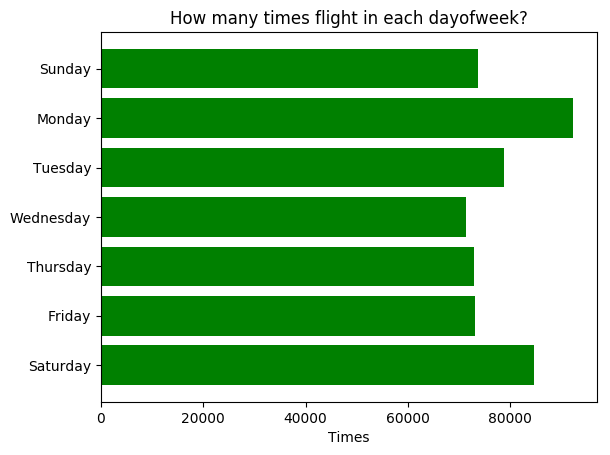

In [3]:
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import db

plt.rcdefaults()
fig, ax = plt.subplots()

weekofday_title = ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday')
y_pos = np.arange(len(weekofday_title))
data = db.query('select dayofweek,count(*) as c1 from ontime group by dayofweek')
times = [ x[1] for x in data ]
error = np.random.rand(len(weekofday_title))

ax.barh(y_pos, times, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(weekofday_title)
ax.invert_yaxis()
ax.set_xlabel('Times')
ax.set_title('How many times flight in each dayofweek?')

plt.show()


###  flight delay chart
https://matplotlib.org/2.0.2/examples/text_labels_and_annotations/text_demo_fontdict.html

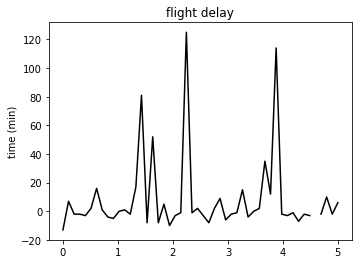

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import db
count = 50
x = np.linspace(0.0, 5.0, count)
data = db.query('select top %d depdelay from ontime order BY flightdate asc' % count)
y = [ d[0] for d in data]

plt.plot(x, y, 'k')
plt.title('flight delay')
plt.ylabel('time (min)')

plt.subplots_adjust(left=0.2)
plt.show()